In [1]:
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import play as lib
from binance.client import Client
from IPython.display import display

## Fetch data

In [4]:
client = lib.get_client()
ONE_HOUR_IN_MS=60 * 60 * 1000
ONE_DAY_IN_MS=24 * ONE_HOUR_IN_MS
ONE_MONTH_IN_MS=30 * ONE_DAY_IN_MS

PAIR_DIC = {
  "MATIC": ["MATICUSDT", './out/pair_MATICUSDT.pkl'],
  "BNB": ["BNBUSDT", './out/pair_BNBUSDT.pkl'],
  "AVAX": ["AVAXUSDT", './out/AVAXUSDT.pkl']
}

In [9]:
def pull_data(PAIR_NAME: str, DATA_FILE: str):
  now = math.floor(time.time() * 1000)
  df = lib.fetch_price(client, PAIR_NAME, now - 3 * ONE_MONTH_IN_MS, now, Client.KLINE_INTERVAL_1HOUR)
  display(df)
  display(df.describe())
  f = plt.figure()
  f.set_figwidth(24)
  plt.plot(df["close_time"], df["close_price"])
  df.to_pickle(DATA_FILE)
  display("Saved to: {0}".format(DATA_FILE))


### MATIC

,close_time,close_price
0,2022-10-28 12:59:59.999,0.9118
1,2022-10-28 13:59:59.999,0.9254
2,2022-10-28 14:59:59.999,0.9285
3,2022-10-28 15:59:59.999,0.9292
4,2022-10-28 16:59:59.999,0.9436
...,...,...
2155,2023-01-26 07:59:59.999,0.9947
2156,2023-01-26 08:59:59.999,0.9993
2157,2023-01-26 09:59:59.999,0.9995
2158,2023-01-26 10:59:59.999,0.9950


,close_price
count,2160.000000
mean,0.896706
std,0.099091
min,0.748400
25%,0.809050
50%,0.890050
75%,0.939675
max,1.273200


'Saved to: ./out/pair_MATICUSDT.pkl'

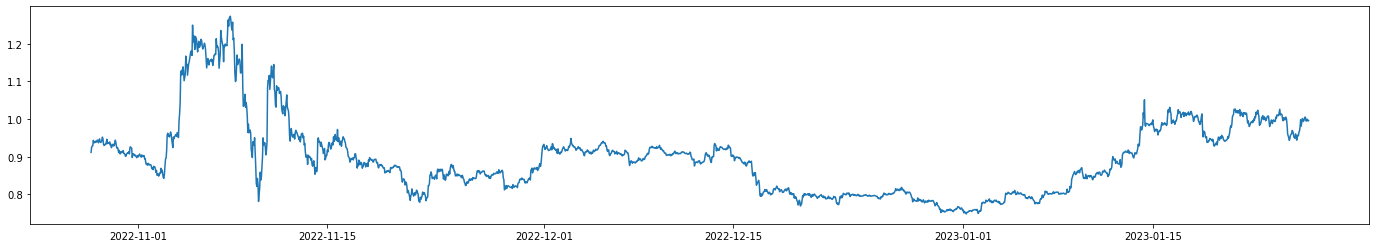

In [10]:
pull_data(PAIR_DIC["MATIC"][0], PAIR_DIC["MATIC"][1])

### BNB

,close_time,close_price
0,2022-10-28 12:59:59.999,289.6
1,2022-10-28 13:59:59.999,292.7
2,2022-10-28 14:59:59.999,293.9
3,2022-10-28 15:59:59.999,296.8
4,2022-10-28 16:59:59.999,298.1
...,...,...
2155,2023-01-26 07:59:59.999,305.9
2156,2023-01-26 08:59:59.999,305.0
2157,2023-01-26 09:59:59.999,304.5
2158,2023-01-26 10:59:59.999,303.7


,close_price
count,2160.000000
mean,282.804259
std,27.851054
min,225.400000
25%,258.875000
50%,286.000000
75%,300.800000
max,375.400000


'Saved to: ./out/pair_BNBUSDT.pkl'

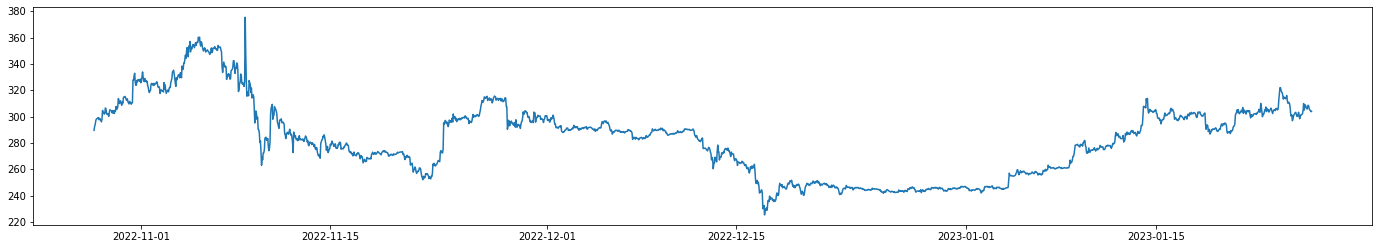

In [11]:
pull_data(PAIR_DIC["BNB"][0], PAIR_DIC["BNB"][1])

,close_time,close_price
0,2022-10-28 12:59:59.999,17.37
1,2022-10-28 13:59:59.999,17.55
2,2022-10-28 14:59:59.999,17.63
3,2022-10-28 15:59:59.999,17.60
4,2022-10-28 16:59:59.999,17.95
...,...,...
2155,2023-01-26 07:59:59.999,18.08
2156,2023-01-26 08:59:59.999,18.09
2157,2023-01-26 09:59:59.999,18.01
2158,2023-01-26 10:59:59.999,17.89


,close_price
count,2160.000000
mean,14.026648
std,2.496468
min,10.670000
25%,11.950000
50%,13.160000
75%,16.080000
max,20.260000


'Saved to: ./out/AVAXUSDT.pkl'

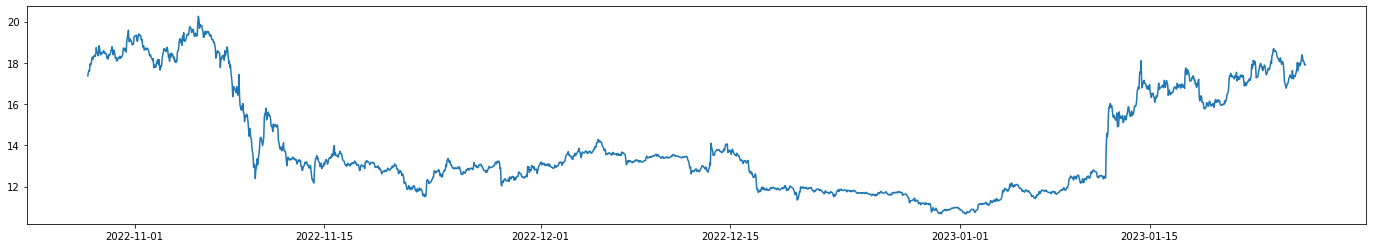

In [12]:
pull_data(PAIR_DIC["AVAX"][0], PAIR_DIC["AVAX"][1])

# Prophet

In [26]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [16]:
def prophet_model(data_path: str):
  display("DATA_SOURCE: {0}".format(data_path))
  df = pd.read_pickle(data_path)
  df = df.rename(columns={"close_time": "ds", "close_price": "y"})
  m = Prophet()
  m.fit(df)

  future = m.make_future_dataframe(periods=5)
  display(future.tail())
  forecast = m.predict(future)
  display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

  fig1 = m.plot(forecast)
  fig1.set_figwidth(24)

  fig2 = m.plot_components(forecast)
  fig2.set_figwidth(24)

  fig = m.plot(forecast)
  fig.set_figwidth(24)
  a = add_changepoints_to_plot(fig.gca(), m, forecast)

  return m,future,forecast
  

'DATA_SOURCE: ./out/pair_MATICUSDT.pkl'

18:51:32 - cmdstanpy - INFO - Chain [1] start processing
18:51:33 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-27 11:59:59.999
2161,2023-01-28 11:59:59.999
2162,2023-01-29 11:59:59.999
2163,2023-01-30 11:59:59.999
2164,2023-01-31 11:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-27 11:59:59.999,1.073340,1.022618,1.124849
2161,2023-01-28 11:59:59.999,1.083964,1.028800,1.134140
2162,2023-01-29 11:59:59.999,1.083303,1.023179,1.135923
2163,2023-01-30 11:59:59.999,1.095844,1.036897,1.155695
2164,2023-01-31 11:59:59.999,1.108467,1.038389,1.178009


(<prophet.forecaster.Prophet at 0x127b07eb0>,
                           ds
 0    2022-10-28 12:59:59.999
 1    2022-10-28 13:59:59.999
 2    2022-10-28 14:59:59.999
 3    2022-10-28 15:59:59.999
 4    2022-10-28 16:59:59.999
 ...                      ...
 2160 2023-01-27 11:59:59.999
 2161 2023-01-28 11:59:59.999
 2162 2023-01-29 11:59:59.999
 2163 2023-01-30 11:59:59.999
 2164 2023-01-31 11:59:59.999
 
 [2165 rows x 1 columns],
                           ds     trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 12:59:59.999  0.893392    0.855430    0.961185     0.893392   
 1    2022-10-28 13:59:59.999  0.893551    0.853709    0.955454     0.893551   
 2    2022-10-28 14:59:59.999  0.893710    0.861427    0.958152     0.893710   
 3    2022-10-28 15:59:59.999  0.893869    0.856035    0.957032     0.893869   
 4    2022-10-28 16:59:59.999  0.894028    0.860326    0.956814     0.894028   
 ...                      ...       ...         ...         ...          ...   
 2160 

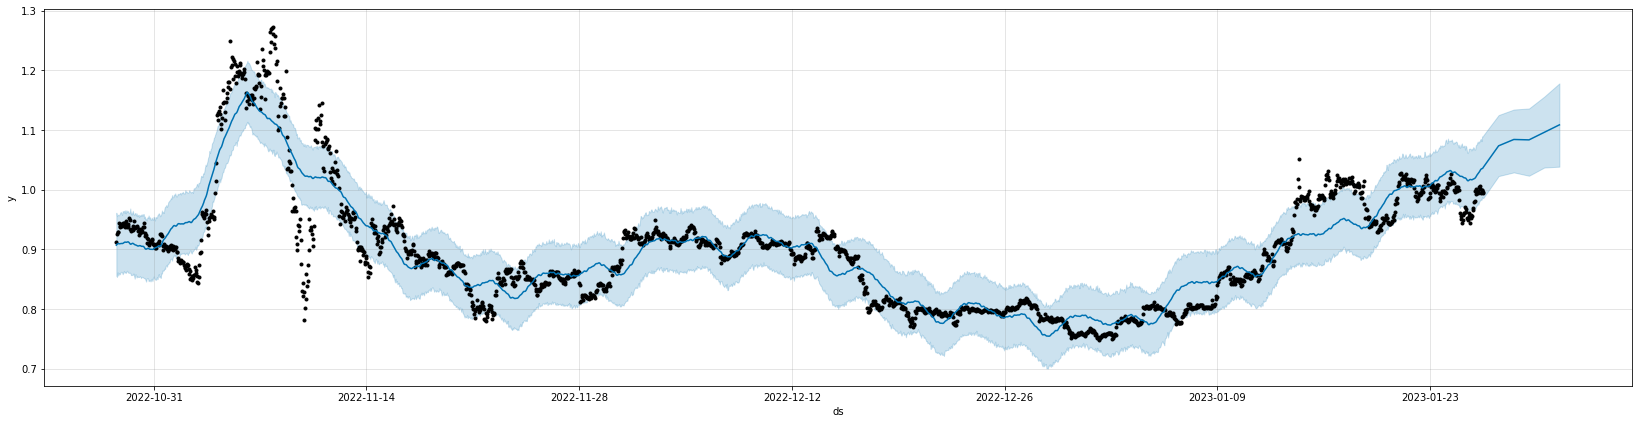

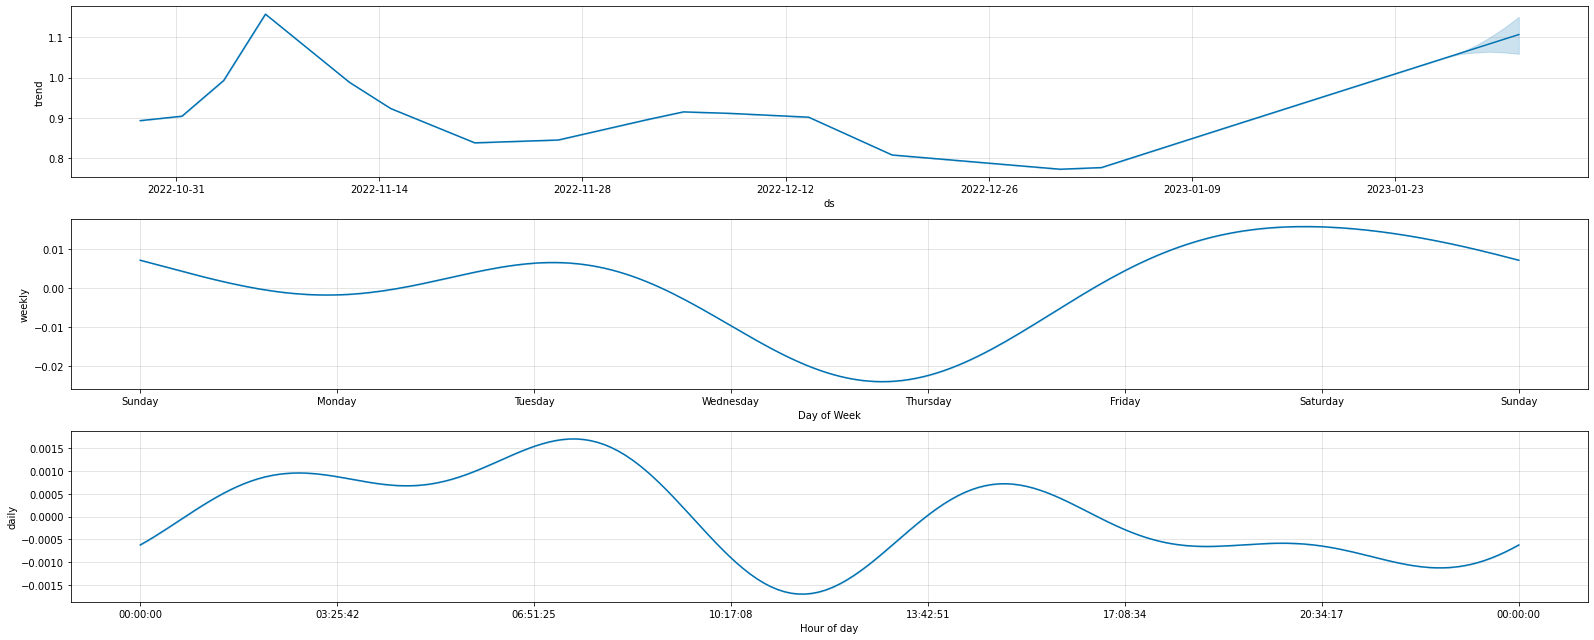

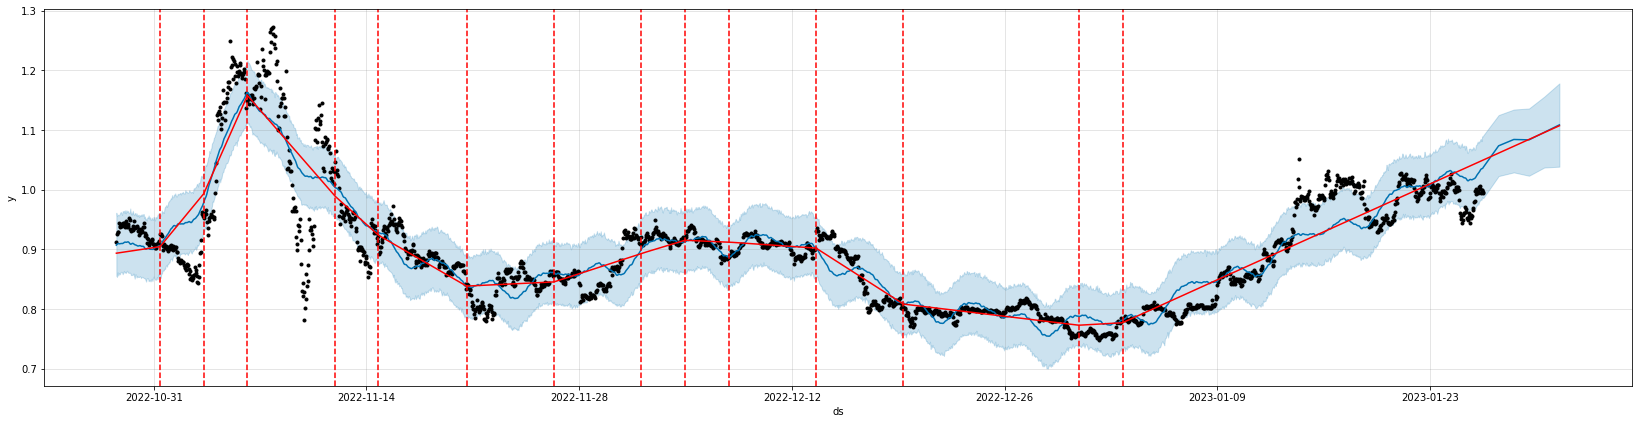

In [22]:
prophet_model(PAIR_DIC["MATIC"][1])

'DATA_SOURCE: ./out/pair_BNBUSDT.pkl'

18:51:42 - cmdstanpy - INFO - Chain [1] start processing
18:51:43 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-27 11:59:59.999
2161,2023-01-28 11:59:59.999
2162,2023-01-29 11:59:59.999
2163,2023-01-30 11:59:59.999
2164,2023-01-31 11:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-27 11:59:59.999,316.669122,308.062199,325.832469
2161,2023-01-28 11:59:59.999,319.123439,309.435969,328.458119
2162,2023-01-29 11:59:59.999,322.554547,310.987127,332.773919
2163,2023-01-30 11:59:59.999,322.742851,310.877733,336.468110
2164,2023-01-31 11:59:59.999,325.073416,307.590121,341.328099


(<prophet.forecaster.Prophet at 0x127fa4c70>,
                           ds
 0    2022-10-28 12:59:59.999
 1    2022-10-28 13:59:59.999
 2    2022-10-28 14:59:59.999
 3    2022-10-28 15:59:59.999
 4    2022-10-28 16:59:59.999
 ...                      ...
 2160 2023-01-27 11:59:59.999
 2161 2023-01-28 11:59:59.999
 2162 2023-01-29 11:59:59.999
 2163 2023-01-30 11:59:59.999
 2164 2023-01-31 11:59:59.999
 
 [2165 rows x 1 columns],
                           ds       trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 12:59:59.999  297.341952  288.520115  306.460235   297.341952   
 1    2022-10-28 13:59:59.999  297.604859  288.781976  306.597809   297.604859   
 2    2022-10-28 14:59:59.999  297.867766  289.783375  307.361126   297.867766   
 3    2022-10-28 15:59:59.999  298.130673  290.183933  308.053704   298.130673   
 4    2022-10-28 16:59:59.999  298.393580  290.014344  308.409442   298.393580   
 ...                      ...         ...         ...         ...         

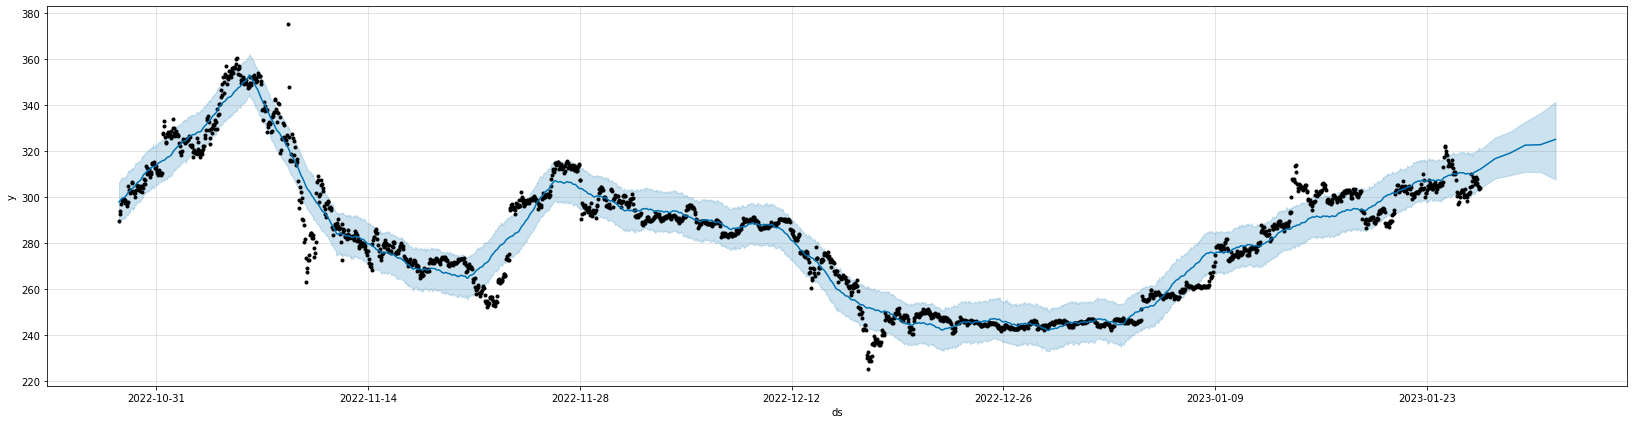

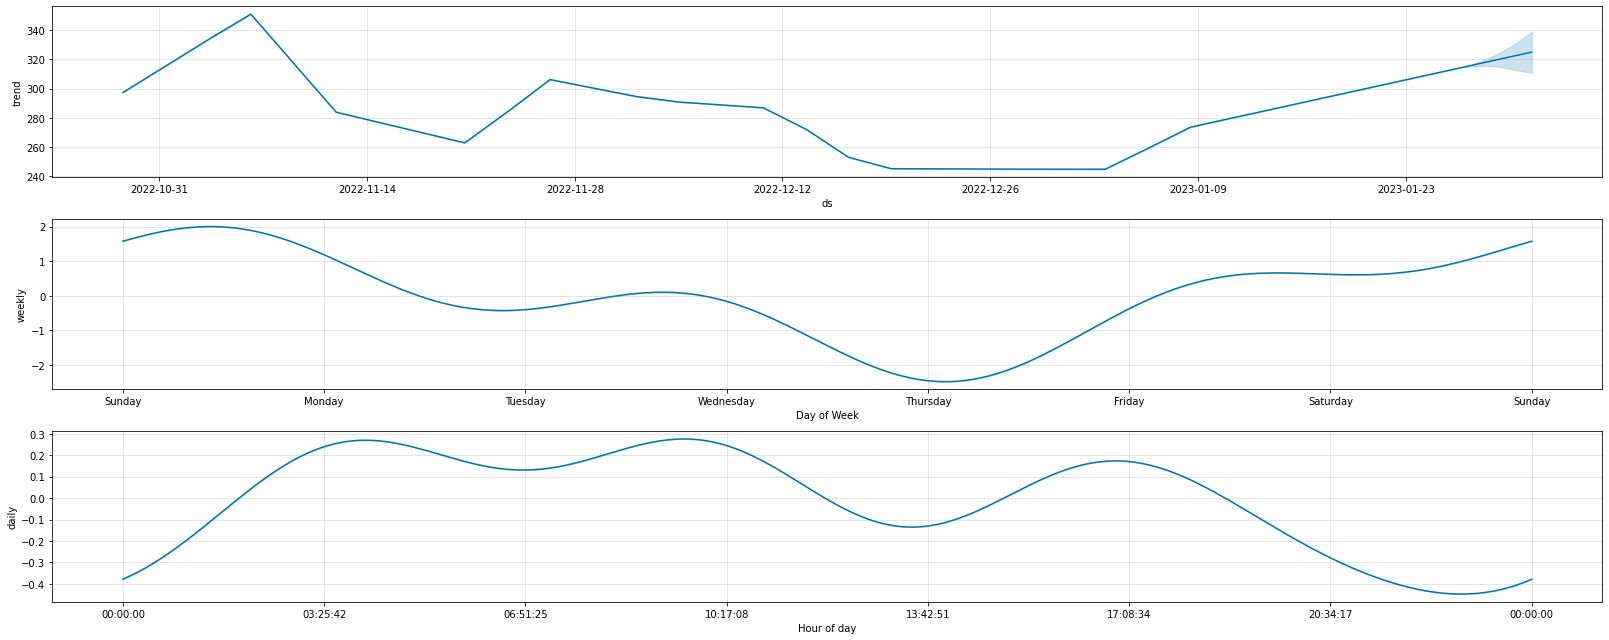

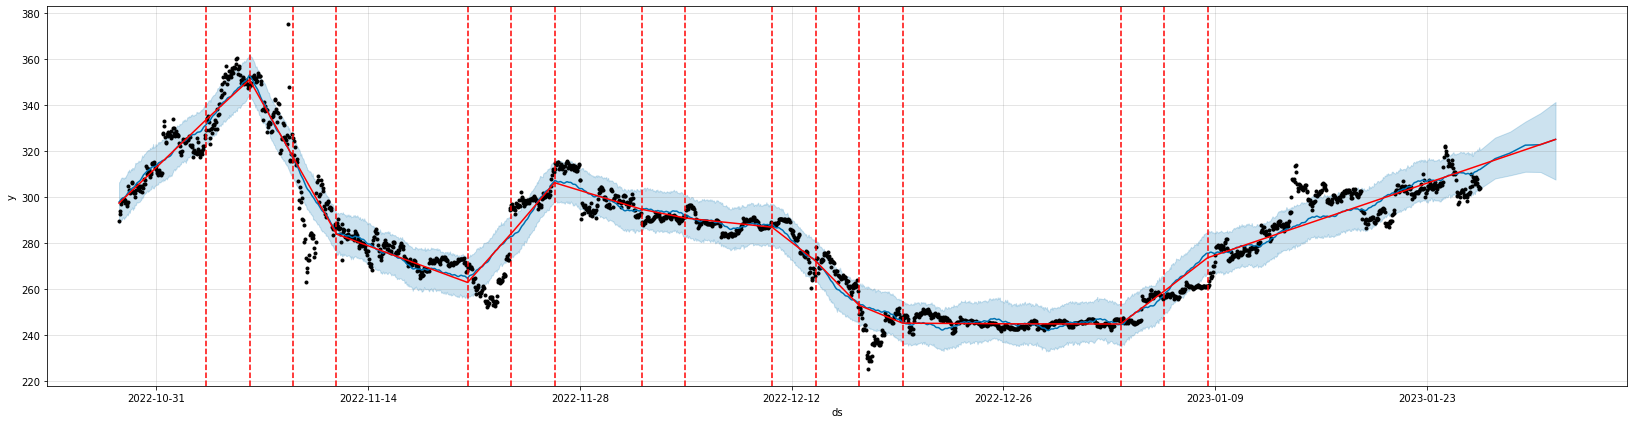

In [23]:
prophet_model(PAIR_DIC["BNB"][1])


'DATA_SOURCE: ./out/AVAXUSDT.pkl'

18:51:47 - cmdstanpy - INFO - Chain [1] start processing
18:51:48 - cmdstanpy - INFO - Chain [1] done processing


,ds
2160,2023-01-27 11:59:59.999
2161,2023-01-28 11:59:59.999
2162,2023-01-29 11:59:59.999
2163,2023-01-30 11:59:59.999
2164,2023-01-31 11:59:59.999


,ds,yhat,yhat_lower,yhat_upper
2160,2023-01-27 11:59:59.999,19.391825,18.649877,20.179953
2161,2023-01-28 11:59:59.999,19.775377,18.940693,20.622487
2162,2023-01-29 11:59:59.999,20.025553,19.203921,20.853917
2163,2023-01-30 11:59:59.999,20.291714,19.397553,21.188242
2164,2023-01-31 11:59:59.999,20.669077,19.627644,21.662875


(<prophet.forecaster.Prophet at 0x127acb280>,
                           ds
 0    2022-10-28 12:59:59.999
 1    2022-10-28 13:59:59.999
 2    2022-10-28 14:59:59.999
 3    2022-10-28 15:59:59.999
 4    2022-10-28 16:59:59.999
 ...                      ...
 2160 2023-01-27 11:59:59.999
 2161 2023-01-28 11:59:59.999
 2162 2023-01-29 11:59:59.999
 2163 2023-01-30 11:59:59.999
 2164 2023-01-31 11:59:59.999
 
 [2165 rows x 1 columns],
                           ds      trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 12:59:59.999  18.319538   17.662252   19.167408    18.319538   
 1    2022-10-28 13:59:59.999  18.322762   17.639390   19.206495    18.322762   
 2    2022-10-28 14:59:59.999  18.325985   17.662263   19.181899    18.325985   
 3    2022-10-28 15:59:59.999  18.329209   17.655777   19.252528    18.329209   
 4    2022-10-28 16:59:59.999  18.332433   17.676686   19.207391    18.332433   
 ...                      ...        ...         ...         ...          ...   

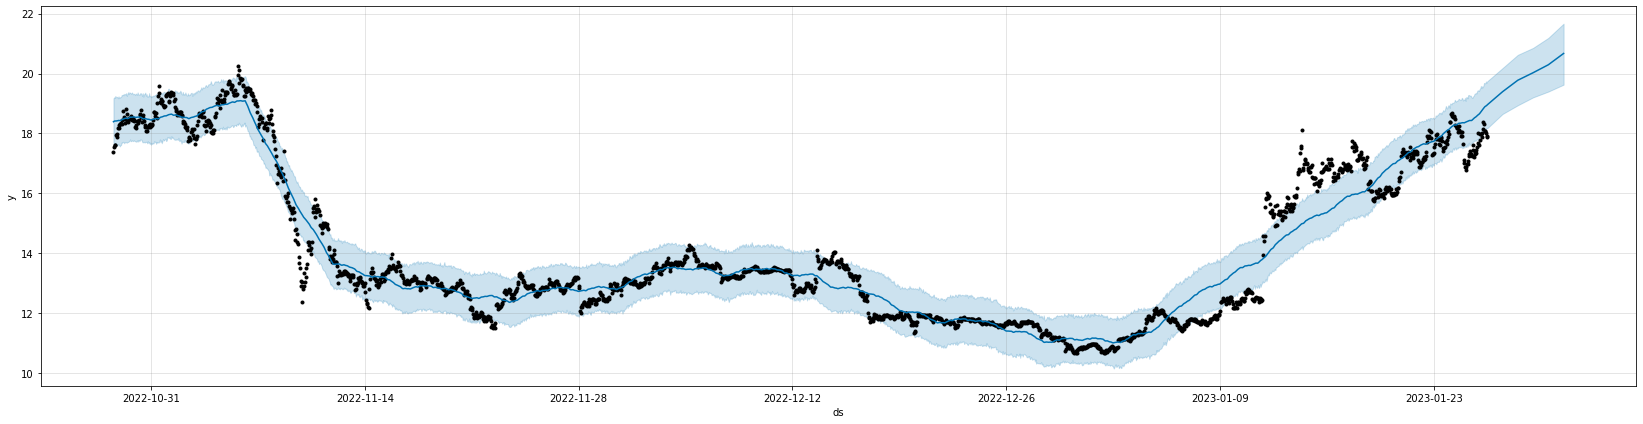

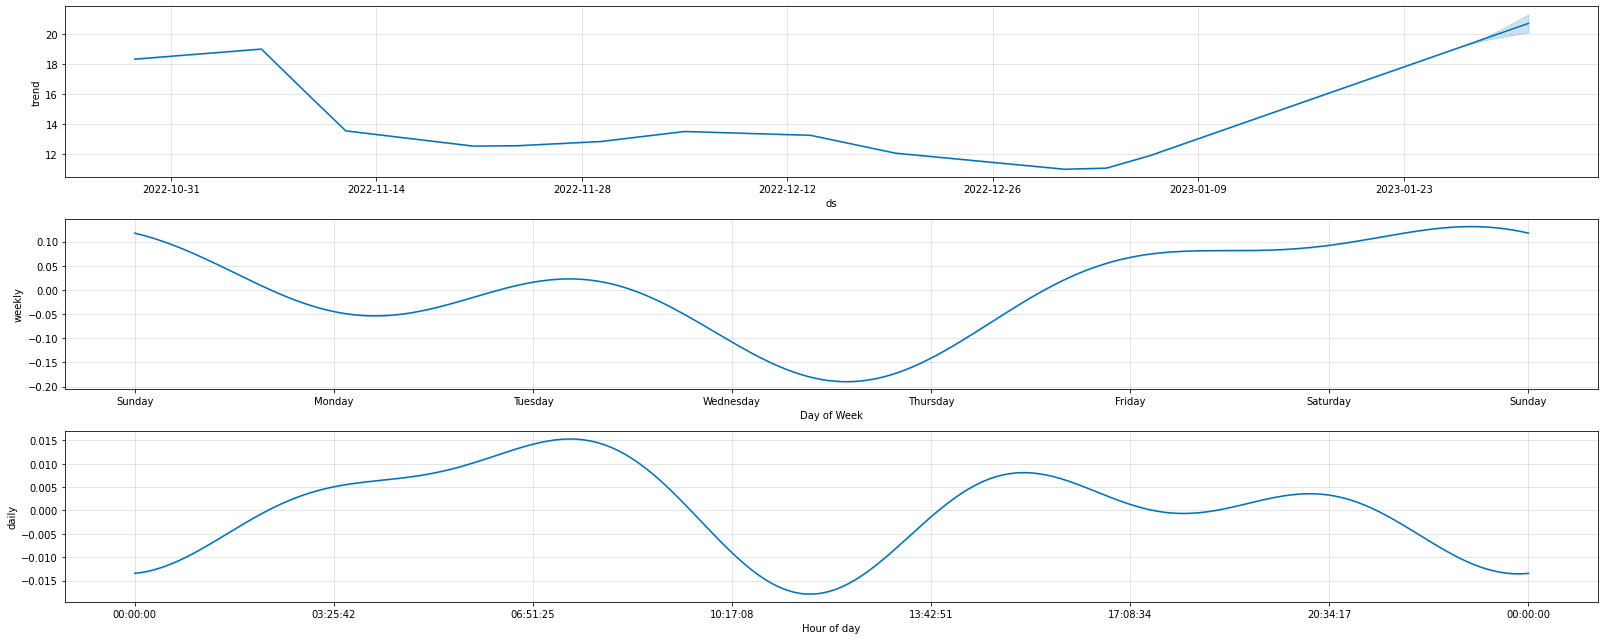

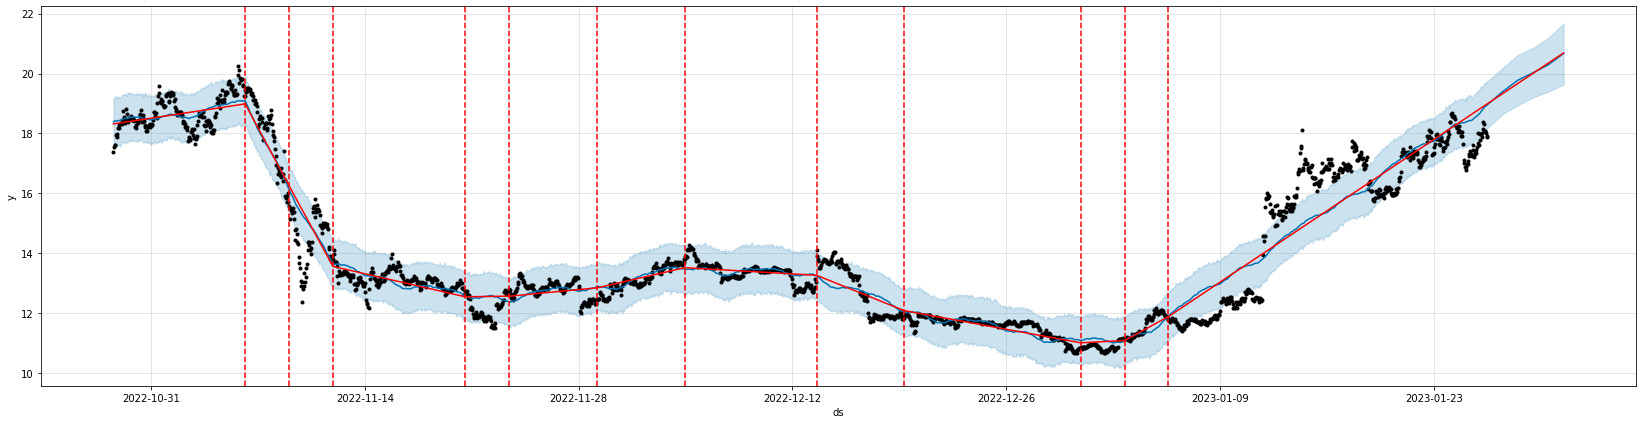

In [24]:
prophet_model(PAIR_DIC["AVAX"][1])